# Homework #3

Name: Salvatore Zerbo

Course: Math 483

Date: 05/17/2019

# Problem 1

## Part 1

In [14]:
import numpy as np
from scipy.stats import sem
np.random.seed(30)

def h(x):
    '''
    Takes an array of values and returns 1
    for the values that are greater than 3.
    '''
    
    arr = []
    for i in range(len(x)):
        if x[i] > 3:
            arr.append(1)
        else:
            arr.append(0)
            
    return np.array(arr)

#Initial setup
n = int(10E4)

#Using n i.i.d. N(0, 1) samples
samples = np.random.normal(0, 1, n)
correct = h(samples)

#Find confidence interval
mu = np.mean(correct)
stderr = sem(correct)
lower = mu - 1.96 * stderr
upper = mu + 1.96 * stderr

print("P(X > 3) = {}".format(sum(correct) / n))
print("95% CI = ({}, {})".format(lower, upper))

P(X > 3) = 0.00138
95% CI = (0.0011499099089832421, 0.0016100900910167577)


## Part 2

In [15]:
np.random.seed(30)

def f(x):
    '''
    Returns the values for the standard 
    normal distribution evaluated at x.
    '''
    
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def g(x):
    '''
    Returns the values for the normal distribution
    N(4, 1) evaluated at x.
    '''
    
    return np.exp(-(x - 4)**2 / 2) / np.sqrt(2 * np.pi)    

#Using n i.i.d. N(4, 1) samples
samples = np.random.normal(4, 1, n)
correct = h(samples) * f(samples) / g(samples)

#Find confidence interval
mu = np.mean(correct)
stderr = sem(correct)
lower = mu - 1.96 * stderr
upper = mu + 1.96 * stderr

#Output
print("P(X > 3) = {}".format(sum(correct) / n))
print("95% CI = ({}, {})".format(lower, upper))

P(X > 3) = 0.001357722708441344
95% CI = (0.0013384438517092742, 0.001377001565173386)


The value from part 2 is much closer to the exact value of 0.00135, and the 95% confidence interval is much tighter around this value.


# Q3.1

In [16]:
np.random.seed(30)

def Energy(x):
    '''
    Returns the energy of state x as
    defined in the problem.
    '''
    
    return (x - 3)**2

def h(x, y):
    '''
    Returns the acceptance probability
    used for the Metropolis Algorithm.
    '''

    return min(1, pdf[y - 1] / pdf[x - 1])

def Z(x):
    '''
    Calculates the partition function for
    the Boltzmann distribution.
    '''
    
    tot = 0

    for i in range(len(x)):
        tot += np.exp(-Energy(x[i] * beta))
        
    return tot

def r(E):
    '''
    Returns the radiation of energy state
    E as defined in the problem.
    '''
    
    return E**4

#Setup
beta = 1
state_space = np.arange(1, 9)
n = int(10E5)
z = Z(state_space)

#Get Boltzmann pdf
pdf = []
for x in state_space:
    pdf.append(np.exp(-Energy(x) * beta) / z)

#Pick random value to start
X = np.random.choice(state_space, replace = True, p = pdf)
r_vals = [r(Energy(X))]

#Run n simulations, drawing from Boltzmann pdf
for i in range(n):
    Y = np.random.randint(1, 9)

    #Draw from uniform
    U = np.random.uniform()
    
    #Accept or reject
    if U < h(X, Y):
        X = Y

    r_vals.append(r(Energy(X)))

print("Mean = {}".format(np.mean(r_vals)))

Mean = 6.1373848626151375


# Q3.5

## Part A - Minimal Neighborhood System

Variance_100 = 1.0656527500000001
Variance_200 = 0.6747252275000001
Variance_1000 = 0.13881304749999995


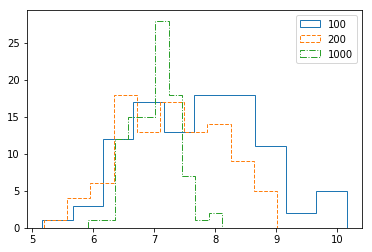

In [17]:
import matplotlib.pyplot as plt
np.random.seed(30)

def h(x, y):
    '''
    Returns the acceptance probability
    used for the Metropolis Algorithm.
    '''
    
    return min(1, f[y - 1] / f[x - 1])

#Setup - minimal neighborhood
G = [[0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5]]
nums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
f = [0, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
linetypes = ["-", "--", "-."]
N = [100, 200, 1000]
instances = 100

#Iterate for different N, also set varying linestyles
for line, n in enumerate(N):
    avg = []

    #Run 100 instances
    for i in range(0, instances):
        #Initialize X array
        X = 12
        X_vals = [X]

        #Run for n trials
        for j in range(0, n):
            Y = np.random.choice(nums, replace = True, p = G[X - 2])
            U = np.random.uniform()
            
            #Accept or reject
            if U < h(X, Y):
                X = Y

            X_vals.append(X)
        avg.append(sum(X_vals) / n)
    
    #Histogram and variance for each scenario
    plt.hist(avg, histtype = "step", label = "{}".format(n), 
             linestyle = linetypes[line])
    print("Variance_{} = {}".format(n, np.var(avg)))
    
#Plot
plt.legend()
plt.show()

## Part 2 - Maximal Neighborhood System

Variance_100 = 0.059044559999999996
Variance_200 = 0.05398671
Variance_1000 = 0.038360564122222225


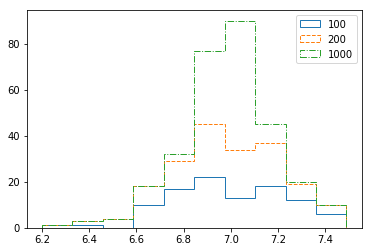

In [18]:
np.random.seed(30)

#Setup - maximal neighborhood
G = [[1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11],
     [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11]]
N = [100, 200, 1000]
avg = []

#Iterate for different N, also set varying linestyles
for line, n in enumerate(N):
    #Run 100 instances
    for i in range(0, instances):
        #Initialize X array
        X_vals = []
        X = 12

        #Run for N trials
        for j in range(0, n):
            Y = np.random.randint(2, 13)
            U = np.random.uniform()

            if U < h(X, Y):
                X = Y

            X_vals.append(X)
        avg.append(sum(X_vals) / n)
        
    #Histogram and variance for each scenario
    plt.hist(avg, histtype = "step", label = "{}".format(n), 
             linestyle = linetypes[line])
    print("Variance_{} = {}".format(n, np.var(avg)))
    
#Plot
plt.legend()
plt.show()

Both the minimal and maximal neighborhood systems seem to converge to an average of about 7. The minimal system starts out with large spread and variance but continues to converge to be more tightly bound around the average. The maximal spread stays fairly consistent, even when increasing N. The variances for the maximal are much less than the variances for the minimal system at first, but they stay relatively consistent. The variances for the minimal eventually become smaller as N increases.

# Q3.6

Acceptance rate at x0=1: 0.8667686676866768
Acceptance rate at x0=10: 0.8665336653366533
Acceptance rate at x0=100: 0.8657653243199098
Acceptance rate at x0=500: 0.8659486594865948


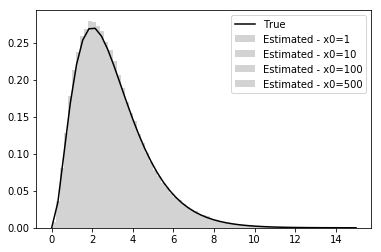

In [19]:
np.random.seed(30)

def h(x, y):
    '''
    Returns the acceptance probability
    used for the Metropolis Algorithm.
    '''
    return min(1, f(y) / f(x))

def f(x):
    '''
    Evaluates the function cx^2 * exp(-x)
    '''
    return 0.5 * x**2 * np.exp(-x)

#Setup
n = int(10E4)
start = [1, 10, 100, 500]
accept = 0
reject = 0

for s in start:
    X = np.zeros(n)
    X[0] = s

    #Run n trials
    for i in range(1, n):
        #Sample on [x-delta, x+delta], here delta = 1
        x = X[i - 1]
        y = x + np.random.uniform(-1, 1)

        #Draw uniform
        U = np.random.uniform()

        #Accept or reject, force positive values
        if U < h(x, y) and y > 0:
            accept += 1
            x = y
        else:
            reject += 1

        X[i] = x
        
    plt.hist(X, density = True, bins = np.arange(0, 13, 0.2), 
             label = "Estimated - x0={}".format(s), 
             color = (0.827, 0.827, 0.827))
    print("Acceptance rate at x0={}: {}".format(s, 
          accept / (accept + reject)))

#Plot pdf vs our samples
x = np.linspace(0, 15)
plt.plot(x, f(x), label = "True", c = "k")
plt.legend()
plt.show()

The pdf matches well for all points. The start point of the algorithm does not seem to affect the results very much. The acceptance vs rejection rate also does not vary much between start points. The efficiency seems to hover around 86.5% acceptance rate.